In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/top-10000-popular-movies/Top_10000_Movies.csv


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn

Loading up the Dataset 

In [3]:
df = pd.read_csv('/kaggle/input/top-10000-popular-movies/Top_10000_Movies.csv',lineterminator='\n')
df

,Unnamed: 0,id,original_language,original_title,popularity,release_date,vote_average,vote_count,genre,overview,revenue,runtime,tagline
0,0,580489,en,Venom: Let There Be Carnage,5401.308,2021-09-30,6.8,1736,"['Science Fiction', 'Action', 'Adventure']",After finding a host body in investigative rep...,424000000,97.0,NaN
1,1,524434,en,Eternals,3365.535,2021-11-03,7.1,622,"['Action', 'Adventure', 'Science Fiction', 'Fa...",The Eternals are a team of ancient aliens who ...,165000000,157.0,In the beginning...
2,2,438631,en,Dune,2911.423,2021-09-15,8.0,3632,"['Action', 'Adventure', 'Science Fiction']","Paul Atreides, a brilliant and gifted young ma...",331116356,155.0,"Beyond fear, destiny awaits."
3,3,796499,en,Army of Thieves,2552.437,2021-10-27,6.9,555,"['Action', 'Crime', 'Thriller']",A mysterious woman recruits bank teller Ludwig...,0,127.0,"Before Vegas, one locksmith became a legend."
4,4,550988,en,Free Guy,1850.470,2021-08-11,7.8,3493,"['Comedy', 'Action', 'Adventure', 'Science Fic...",A bank teller called Guy realizes he is a back...,331096766,115.0,Life's too short to be a background character.
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9995,530,en,A Grand Day Out,9.266,1990-05-18,7.5,594,"['Adventure', 'Animation', 'Comedy', 'Science ...",Wallace and Gromit have run out of cheese and ...,0,23.0,NaN
9996,9996,15934,en,El cantante,10.417,2006-09-12,7.0,80,"['History', 'Drama', 'Music']","The rise and fall of salsa singer, Héctor Lavo...",0,116.0,"Based on the true story of the King of Salsa, ..."
9997,9997,162215,en,How I Live Now,9.520,2013-09-10,6.6,705,"['Drama', 'Action', 'Thriller', 'War']",An American girl on holiday in the English cou...,0,101.0,Love will lead you home
9998,9998,5723,en,Once,9.267,2007-03-23,7.4,990,"['Drama', 'Music', 'Romance']",A vacuum repairman moonlights as a street musi...,20710513,85.0,How often do you find the right person?


I can see all data here, need to remove unamed column as it is not necessary  

This code allows me to remove the unamed column 

In [4]:
df.drop('Unnamed: 0', axis = 1, inplace = True)

df

,id,original_language,original_title,popularity,release_date,vote_average,vote_count,genre,overview,revenue,runtime,tagline
0,580489,en,Venom: Let There Be Carnage,5401.308,2021-09-30,6.8,1736,"['Science Fiction', 'Action', 'Adventure']",After finding a host body in investigative rep...,424000000,97.0,NaN
1,524434,en,Eternals,3365.535,2021-11-03,7.1,622,"['Action', 'Adventure', 'Science Fiction', 'Fa...",The Eternals are a team of ancient aliens who ...,165000000,157.0,In the beginning...
2,438631,en,Dune,2911.423,2021-09-15,8.0,3632,"['Action', 'Adventure', 'Science Fiction']","Paul Atreides, a brilliant and gifted young ma...",331116356,155.0,"Beyond fear, destiny awaits."
3,796499,en,Army of Thieves,2552.437,2021-10-27,6.9,555,"['Action', 'Crime', 'Thriller']",A mysterious woman recruits bank teller Ludwig...,0,127.0,"Before Vegas, one locksmith became a legend."
4,550988,en,Free Guy,1850.470,2021-08-11,7.8,3493,"['Comedy', 'Action', 'Adventure', 'Science Fic...",A bank teller called Guy realizes he is a back...,331096766,115.0,Life's too short to be a background character.
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,530,en,A Grand Day Out,9.266,1990-05-18,7.5,594,"['Adventure', 'Animation', 'Comedy', 'Science ...",Wallace and Gromit have run out of cheese and ...,0,23.0,NaN
9996,15934,en,El cantante,10.417,2006-09-12,7.0,80,"['History', 'Drama', 'Music']","The rise and fall of salsa singer, Héctor Lavo...",0,116.0,"Based on the true story of the King of Salsa, ..."
9997,162215,en,How I Live Now,9.520,2013-09-10,6.6,705,"['Drama', 'Action', 'Thriller', 'War']",An American girl on holiday in the English cou...,0,101.0,Love will lead you home
9998,5723,en,Once,9.267,2007-03-23,7.4,990,"['Drama', 'Music', 'Romance']",A vacuum repairman moonlights as a street musi...,20710513,85.0,How often do you find the right person?


We are taking a deep look at Data Types (Dates, Not a number and so on) 

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 10000 non-null  int64  
 1   original_language  10000 non-null  object 
 2   original_title     10000 non-null  object 
 3   popularity         10000 non-null  float64
 4   release_date       9962 non-null   object 
 5   vote_average       10000 non-null  float64
 6   vote_count         10000 non-null  int64  
 7   genre              10000 non-null  object 
 8   overview           9900 non-null   object 
 9   revenue            10000 non-null  int64  
 10  runtime            9991 non-null   float64
 11  tagline            7080 non-null   object 
dtypes: float64(3), int64(3), object(6)
memory usage: 937.6+ KB


From this i can that Overview, Tagline, Genre, Release_date, Original _title, Original_language are all objects 

Tagline and Overviews has a few Non null counts, but this does not matter as they are quick descriptions in every movie or series release in the dataset. 

When we look at the other objects they all have a non null count of 100000 except from these two "Runtime" and "Release date" which means we need to come uo with a solution to fix this 

The column'release_date' is object type instead of datetype whuch we also need to fix   

In [6]:
df.release_date = pd.to_datetime(df.release_date)
df.release_date

0      2021-09-30
1      2021-11-03
2      2021-09-15
3      2021-10-27
4      2021-08-11
          ...    
9995   1990-05-18
9996   2006-09-12
9997   2013-09-10
9998   2007-03-23
9999   2016-05-20
Name: release_date, Length: 10000, dtype: datetime64[ns]

We can now check if our "release date" has changed into a datatype

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   id                 10000 non-null  int64         
 1   original_language  10000 non-null  object        
 2   original_title     10000 non-null  object        
 3   popularity         10000 non-null  float64       
 4   release_date       9962 non-null   datetime64[ns]
 5   vote_average       10000 non-null  float64       
 6   vote_count         10000 non-null  int64         
 7   genre              10000 non-null  object        
 8   overview           9900 non-null   object        
 9   revenue            10000 non-null  int64         
 10  runtime            9991 non-null   float64       
 11  tagline            7080 non-null   object        
dtypes: datetime64[ns](1), float64(3), int64(3), object(5)
memory usage: 937.6+ KB


Describing Our Data 

In [8]:
df.describe()

,id,popularity,release_date,vote_average,vote_count,revenue,runtime
count,10000.0000,10000.000000,9962,10000.00000,10000.000000,1.000000e+04,9991.000000
mean,250053.0833,34.516871,2008-01-19 08:18:07.010640384,6.29875,1315.084900,5.736388e+07,98.773596
min,5.0000,6.269000,1902-04-17 00:00:00,0.00000,0.000000,0.000000e+00,0.000000
25%,11866.7500,11.908000,2002-11-29 06:00:00,5.90000,118.000000,0.000000e+00,89.000000
50%,144476.0000,17.488000,2012-11-09 00:00:00,6.50000,425.500000,5.912300e+05,99.000000
75%,451485.0000,29.626250,2018-03-08 00:00:00,7.10000,1297.250000,4.764549e+07,113.000000
max,893478.0000,5401.308000,2028-12-20 00:00:00,9.50000,30184.000000,2.847246e+09,400.000000
std,261734.6183,100.693958,NaN,1.43426,2501.899103,1.480771e+08,28.800581


Looking at this dataset, i can tell the values in "vote_average" and "vote_count" looks odd. I will need to investigate this further, this could happen due to in accurate data

To get more understanding for "vote_average and "vote_count"

In [9]:
# Check unique values in 'vote_average' and 'vote_count' columns
print("Unique values in 'vote_average':", df['vote_average'].unique())
print("Unique values in 'vote_count':", df['vote_count'].unique())

# Filter rows where 'vote_average' is zero and 'vote_count' is greater than zero
zero_average_high_count = df[(df['vote_average'] == 0) & (df['vote_count'] > 0)]

# Display the relevant columns for analysis
print(zero_average_high_count[['original_title', 'vote_average', 'vote_count']])


Unique values in 'vote_average': [6.8 7.1 8.  6.9 7.8 6.5 7.  4.1 6.3 7.4 8.4 7.7 5.5 5.8 5.4 7.9 6.  6.6
 6.2 8.2 7.6 7.3 4.4 8.3 4.9 8.1 6.7 7.5 7.2 5.6 0.  6.4 6.1 5.  8.5 3.7
 5.7 5.1 5.3 3.3 5.2 4.7 5.9 4.5 3.2 8.6 2.  4.  4.8 4.3 4.2 9.4 3.  2.9
 8.7 4.6 2.5 3.5 3.9 9.3 3.8 1.5 8.8 3.6 3.4 9.  9.2 9.5 2.8 9.1 3.1 1.3
 2.7]
Unique values in 'vote_count': [1736  622 3632 ...  944  777  632]
Empty DataFrame
Columns: [original_title, vote_average, vote_count]
Index: []


This lets me know that there are movies in this dataset where the 'vote_average' is 0, but the 'vote_count' is greater than 0. This could be important depending on what caused this. 

For example, a 0 in both 'vote_count' and 'vote_average' would make sense because the film has no votes, therefore, no rating. 

However, if a film got 0 in 'vote_average' yet it got an actual number (N) in 'vote_count', it would mean that a number of N users voted 0 for that film which don't add up  

Missing dates 

In [10]:
df.sort_values('release_date')

,id,original_language,original_title,popularity,release_date,vote_average,vote_count,genre,overview,revenue,runtime,tagline
8384,775,fr,Le Voyage dans la Lune,12.469,1902-04-17,8.0,1223,"['Adventure', 'Fantasy', 'Science Fiction']",Professor Barbenfouillis and five of his colle...,0,14.0,NaN
6995,234,de,Das Cabinet des Dr. Caligari,9.258,1920-02-27,7.9,1019,"['Drama', 'Horror', 'Thriller', 'Crime']","Francis, a young man, recalls in his memory th...",8811,77.0,You must become Caligari!
7099,653,de,"Nosferatu, eine Symphonie des Grauens",12.428,1922-02-17,7.7,1335,"['Drama', 'Fantasy', 'Horror']",Vampire Count Orlok is interested in a new res...,19054,94.0,A symphony of horror.
9868,669,en,Nanook of the North,9.528,1922-06-11,7.1,189,"['Documentary', 'Adventure']",This pioneering documentary film depicts the l...,0,79.0,A story of life and love in the actual Arctic.
9046,22596,en,Safety Last!,10.377,1923-04-01,7.9,303,"['Comedy', 'Romance', 'Action']",When a store clerk organizes a contest to clim...,1500000,74.0,"You're Going to Explode With ""Safety Laughs"" w..."
...,...,...,...,...,...,...,...,...,...,...,...,...
7655,642885,en,Hocus Pocus 2,9.594,NaT,0.0,0,"['Fantasy', 'Family', 'Comedy']",Sequel to Hocus Pocus (1993) planned for 2022.,0,0.0,Revenge is a witch.
7727,346698,en,Barbie,11.329,NaT,0.0,0,['Comedy'],A doll living in Barbieland is expelled for no...,0,0.0,NaN
9581,841281,es,El sexo me da risa 7,13.090,NaT,5.0,1,[],NaN,0,0.0,NaN
9625,297797,en,Green Lantern Corps,9.055,NaT,0.0,0,"['Action', 'Adventure', 'Science Fiction']",A group of humans join the Green Lantern Corps...,0,0.0,NaN


From this we can observe their are a some movies or series with NaT (Not a Time)

This makes us aware about the missiing values 

Looking for films with an inaccurate realease date 

In [11]:
df.loc[df.release_date.isna()]


,id,original_language,original_title,popularity,release_date,vote_average,vote_count,genre,overview,revenue,runtime,tagline
564,875828,en,Untitled Peaky Blinders Film,100.232,NaT,0.0,0,[],An untitled film connected to the hit BBC TV S...,0,0.0,NaN
567,610150,ja,ドラゴンボール超：スーパーヒーロー,88.668,NaT,0.0,0,"['Animation', 'Science Fiction', 'Action']",NaN,0,0.0,NaN
619,616851,en,Untitled 'The Walking Dead' Film,82.870,NaT,0.0,0,"['Adventure', 'Drama', 'Horror', 'Science Fict...",Follows Rick Grimes from the departure of his ...,0,0.0,Rick Grimes Returns
638,553301,en,Your Name,98.507,NaT,0.0,0,"['Drama', 'Fantasy', 'Romance']",J.J. Abrams and Paramount Pictures have announ...,0,0.0,NaN
721,719923,ko,TXT (투모로우바이투게더) 'Eternally',69.673,NaT,8.0,3,['Drama'],Eternally is the sixth and final track of the ...,0,19.0,NaN
783,533535,en,Deadpool 3,70.498,NaT,0.0,0,"['Action', 'Science Fiction', 'Comedy']",NaN,0,0.0,NaN
1155,891060,en,Spider-Man: Lotus,79.384,NaT,0.0,0,"['Action', 'Drama']",Following the tragic death of his former girlf...,0,0.0,The capacity of good rests within us all.
1810,496450,en,Ladybug & Cat Noir Awakening,30.067,NaT,0.0,0,"['Action', 'Romance', 'Animation', 'Music', 'F...",Ladybug & Cat Noir Awakening is an upcoming an...,0,0.0,NaN
1861,615129,en,Pokémon Detective Pikachu 2,36.675,NaT,0.0,0,"['Action', 'Adventure', 'Fantasy']",Sequel to the 2019 film Pokémon Detective Pikachu,0,0.0,NaN
1879,889474,en,Boku no Hero Academia Season 1,39.654,NaT,0.0,0,[],"The appearance of ""quirks,"" newly discovered s...",0,312.0,僕のヒーローアカデミア


We can see films that do not have a release date, this could be beacuse the fims haven't been released yet

It's safe to drop these 

In [12]:
df.dropna(axis = 0, subset = ['release_date'], inplace = True)
df

,id,original_language,original_title,popularity,release_date,vote_average,vote_count,genre,overview,revenue,runtime,tagline
0,580489,en,Venom: Let There Be Carnage,5401.308,2021-09-30,6.8,1736,"['Science Fiction', 'Action', 'Adventure']",After finding a host body in investigative rep...,424000000,97.0,NaN
1,524434,en,Eternals,3365.535,2021-11-03,7.1,622,"['Action', 'Adventure', 'Science Fiction', 'Fa...",The Eternals are a team of ancient aliens who ...,165000000,157.0,In the beginning...
2,438631,en,Dune,2911.423,2021-09-15,8.0,3632,"['Action', 'Adventure', 'Science Fiction']","Paul Atreides, a brilliant and gifted young ma...",331116356,155.0,"Beyond fear, destiny awaits."
3,796499,en,Army of Thieves,2552.437,2021-10-27,6.9,555,"['Action', 'Crime', 'Thriller']",A mysterious woman recruits bank teller Ludwig...,0,127.0,"Before Vegas, one locksmith became a legend."
4,550988,en,Free Guy,1850.470,2021-08-11,7.8,3493,"['Comedy', 'Action', 'Adventure', 'Science Fic...",A bank teller called Guy realizes he is a back...,331096766,115.0,Life's too short to be a background character.
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,530,en,A Grand Day Out,9.266,1990-05-18,7.5,594,"['Adventure', 'Animation', 'Comedy', 'Science ...",Wallace and Gromit have run out of cheese and ...,0,23.0,NaN
9996,15934,en,El cantante,10.417,2006-09-12,7.0,80,"['History', 'Drama', 'Music']","The rise and fall of salsa singer, Héctor Lavo...",0,116.0,"Based on the true story of the King of Salsa, ..."
9997,162215,en,How I Live Now,9.520,2013-09-10,6.6,705,"['Drama', 'Action', 'Thriller', 'War']",An American girl on holiday in the English cou...,0,101.0,Love will lead you home
9998,5723,en,Once,9.267,2007-03-23,7.4,990,"['Drama', 'Music', 'Romance']",A vacuum repairman moonlights as a street musi...,20710513,85.0,How often do you find the right person?


Runtime missing values

Very important to know the movie's runtime. 

Let's see films without a proper runtime.

In [13]:
runnan = df.loc[df.runtime.isna()]
runnan

,id,original_language,original_title,popularity,release_date,vote_average,vote_count,genre,overview,revenue,runtime,tagline
5113,496032,en,Porno Baby,20.603,1974-02-24,5.6,5,['Drama'],A woman undergoes psychological evaluation for...,0,NaN,NaN
5250,273831,es,Cómo Filmar Una XXX,19.330,2017-11-29,6.0,14,['Comedy'],"Ulises Alpuyeca, a film initiate, wants to ma...",0,NaN,NaN
6701,477214,en,Paris Porno,11.962,1976-01-01,5.8,4,[],A couple from the French countryside/provinces...,0,NaN,NaN
7084,333746,en,Sherkat-e Jahelan Dar Los Angeles,15.790,1980-01-02,3.5,2,[],Iranian film made in Los Angeles in the 1980s.,0,NaN,NaN
7152,543976,en,Marvel Zombies VS Army of Darkness,9.968,2013-11-18,0.0,0,"['Horror', 'Action', 'Science Fiction']",NaN,0,NaN,NaN
7710,450852,pt,Suzy... Sexo Ardente,9.582,1982-04-06,0.0,0,[],NaN,0,NaN,NaN
8299,504947,en,Halloween: Black Eyes,8.545,2010-02-13,2.5,2,[],Halloween Black Eyes is the 3rd Halloween Fan ...,0,NaN,NaN
8660,540242,pt,"Roberta, a Gueixa do Sexo",8.928,1978-06-22,0.0,0,[],NaN,0,NaN,NaN
9267,320705,en,Chuckie - Dirty Dutch In the Valley,13.353,2014-12-12,0.0,0,[],The King of Dirty House is at the top of his g...,0,NaN,NaN


We can remove this from the list 

In [14]:
df.dropna(subset=['runtime'],inplace=True)
df

,id,original_language,original_title,popularity,release_date,vote_average,vote_count,genre,overview,revenue,runtime,tagline
0,580489,en,Venom: Let There Be Carnage,5401.308,2021-09-30,6.8,1736,"['Science Fiction', 'Action', 'Adventure']",After finding a host body in investigative rep...,424000000,97.0,NaN
1,524434,en,Eternals,3365.535,2021-11-03,7.1,622,"['Action', 'Adventure', 'Science Fiction', 'Fa...",The Eternals are a team of ancient aliens who ...,165000000,157.0,In the beginning...
2,438631,en,Dune,2911.423,2021-09-15,8.0,3632,"['Action', 'Adventure', 'Science Fiction']","Paul Atreides, a brilliant and gifted young ma...",331116356,155.0,"Beyond fear, destiny awaits."
3,796499,en,Army of Thieves,2552.437,2021-10-27,6.9,555,"['Action', 'Crime', 'Thriller']",A mysterious woman recruits bank teller Ludwig...,0,127.0,"Before Vegas, one locksmith became a legend."
4,550988,en,Free Guy,1850.470,2021-08-11,7.8,3493,"['Comedy', 'Action', 'Adventure', 'Science Fic...",A bank teller called Guy realizes he is a back...,331096766,115.0,Life's too short to be a background character.
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,530,en,A Grand Day Out,9.266,1990-05-18,7.5,594,"['Adventure', 'Animation', 'Comedy', 'Science ...",Wallace and Gromit have run out of cheese and ...,0,23.0,NaN
9996,15934,en,El cantante,10.417,2006-09-12,7.0,80,"['History', 'Drama', 'Music']","The rise and fall of salsa singer, Héctor Lavo...",0,116.0,"Based on the true story of the King of Salsa, ..."
9997,162215,en,How I Live Now,9.520,2013-09-10,6.6,705,"['Drama', 'Action', 'Thriller', 'War']",An American girl on holiday in the English cou...,0,101.0,Love will lead you home
9998,5723,en,Once,9.267,2007-03-23,7.4,990,"['Drama', 'Music', 'Romance']",A vacuum repairman moonlights as a street musi...,20710513,85.0,How often do you find the right person?


Now let's have a look at our data types 

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9953 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   id                 9953 non-null   int64         
 1   original_language  9953 non-null   object        
 2   original_title     9953 non-null   object        
 3   popularity         9953 non-null   float64       
 4   release_date       9953 non-null   datetime64[ns]
 5   vote_average       9953 non-null   float64       
 6   vote_count         9953 non-null   int64         
 7   genre              9953 non-null   object        
 8   overview           9866 non-null   object        
 9   revenue            9953 non-null   int64         
 10  runtime            9953 non-null   float64       
 11  tagline            7073 non-null   object        
dtypes: datetime64[ns](1), float64(3), int64(3), object(5)
memory usage: 1010.9+ KB


We are getting somewhere as we have removed some annomiles

Let's have a look at look in our spreadsheet for any 0s in 'vote_count" and "runtime" 

If their is any we may have to make sepreate dataframe for this

In [16]:
# Select rows in the DataFrame where the 'runtime' column is equal to zero
df.loc[df.runtime == 0]

,id,original_language,original_title,popularity,release_date,vote_average,vote_count,genre,overview,revenue,runtime,tagline
11,843241,ja,劇場版 七つの大罪 光に呪われし者たち,1108.815,2021-07-02,8.4,210,"['Animation', 'Action']","With the help of the ""Dragon Sin of Wrath"" Mel...",0,0.0,NaN
27,772436,es,Matando Cabos 2: La Máscara del Máscara,693.568,2021-10-01,7.9,57,"['Action', 'Comedy', 'Adventure']",Faced with the unexpected death of his estrang...,0,0.0,NaN
56,882206,en,LOL Surprise: The Movie,414.698,2021-10-08,7.5,31,"['Animation', 'Family']",Dazzling doll sisters Queen Bee and Royal Bee ...,0,0.0,NaN
61,634649,en,Spider-Man: No Way Home,480.702,2021-12-15,0.0,0,"['Action', 'Adventure', 'Science Fiction']",Peter Parker is unmasked and no longer able to...,0,0.0,NaN
121,573164,es,Un rescate de huevitos,268.087,2021-08-12,8.1,256,"['Animation', 'Comedy']",A rooster and his fowl partner embark on a dan...,0,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
9722,840429,zh,Shang Shan,8.667,2021-06-11,0.0,0,[],NaN,0,0.0,NaN
9728,658241,es,Atrevimiento,9.343,2019-06-14,7.0,1,"['Mystery', 'Thriller']",NaN,0,0.0,NaN
9772,657847,en,Mr. Robot: Behind the Mask,10.006,2017-01-01,9.1,7,['Documentary'],Mr. Robot documentary,0,0.0,NaN
9824,858090,en,Abstract Eternalism,10.226,2021-08-05,0.0,0,[],Premiere at the Museum of Modern Art in New Yo...,0,0.0,NaN


Films like Spider-Man No Way Home or Encanto have no runtime or vote_count even though their popularity is outstanding. 

It could be the dataset i have is old and these films haven't come out yet by the time this data set was made.

The dataframe without 0s in 'runtime' is going to be added to df2.

In [17]:
# Create a new DataFrame df2 by dropping rows where the 'runtime' column has a value of zero
# This is done to filter out movies with reported runtimes of zero from the original DataFrame (df)
# The resulting DataFrame df2 contains only movies with non-zero runtimes, excluding potential errors or missing data.

df2 = df.drop(df[df.runtime == 0].index)
df2 


,id,original_language,original_title,popularity,release_date,vote_average,vote_count,genre,overview,revenue,runtime,tagline
0,580489,en,Venom: Let There Be Carnage,5401.308,2021-09-30,6.8,1736,"['Science Fiction', 'Action', 'Adventure']",After finding a host body in investigative rep...,424000000,97.0,NaN
1,524434,en,Eternals,3365.535,2021-11-03,7.1,622,"['Action', 'Adventure', 'Science Fiction', 'Fa...",The Eternals are a team of ancient aliens who ...,165000000,157.0,In the beginning...
2,438631,en,Dune,2911.423,2021-09-15,8.0,3632,"['Action', 'Adventure', 'Science Fiction']","Paul Atreides, a brilliant and gifted young ma...",331116356,155.0,"Beyond fear, destiny awaits."
3,796499,en,Army of Thieves,2552.437,2021-10-27,6.9,555,"['Action', 'Crime', 'Thriller']",A mysterious woman recruits bank teller Ludwig...,0,127.0,"Before Vegas, one locksmith became a legend."
4,550988,en,Free Guy,1850.470,2021-08-11,7.8,3493,"['Comedy', 'Action', 'Adventure', 'Science Fic...",A bank teller called Guy realizes he is a back...,331096766,115.0,Life's too short to be a background character.
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,530,en,A Grand Day Out,9.266,1990-05-18,7.5,594,"['Adventure', 'Animation', 'Comedy', 'Science ...",Wallace and Gromit have run out of cheese and ...,0,23.0,NaN
9996,15934,en,El cantante,10.417,2006-09-12,7.0,80,"['History', 'Drama', 'Music']","The rise and fall of salsa singer, Héctor Lavo...",0,116.0,"Based on the true story of the King of Salsa, ..."
9997,162215,en,How I Live Now,9.520,2013-09-10,6.6,705,"['Drama', 'Action', 'Thriller', 'War']",An American girl on holiday in the English cou...,0,101.0,Love will lead you home
9998,5723,en,Once,9.267,2007-03-23,7.4,990,"['Drama', 'Music', 'Romance']",A vacuum repairman moonlights as a street musi...,20710513,85.0,How often do you find the right person?


It's important to mention that there are films with a proper runtime but with 0 votes.

In [18]:
# Select rows in the DataFrame df2 where the 'vote_count' column is equal to zero
# This helps identify movies in the filtered DataFrame with zero vote counts
# It can be useful to examine instances where movies have not been rated or have missing vote count data.
df2.loc[df2.vote_count == 0]

,id,original_language,original_title,popularity,release_date,vote_average,vote_count,genre,overview,revenue,runtime,tagline
114,568124,en,Encanto,265.395,2021-11-24,0.0,0,"['Family', 'Music', 'Adventure', 'Animation', ...","The tale of an extraordinary family, the Madri...",0,99.0,There's a little magic in all of us ...almost ...
244,743439,en,PAW Patrol: Jet to the Rescue,157.469,2021-12-02,0.0,0,"['Family', 'Animation']",Get ready to zoom back to Barkingburg with the...,0,56.0,NaN
306,438695,en,Sing 2,117.070,2021-12-02,0.0,0,"['Family', 'Comedy', 'Animation', 'Drama', 'Mu...",Buster and his new cast now have their sights ...,0,112.0,Where will your dreams take you?
447,460458,en,Resident Evil: Welcome to Raccoon City,88.822,2021-11-24,0.0,0,"['Horror', 'Action', 'Mystery']",Once the booming home of pharmaceutical giant ...,0,107.0,Witness the beginning of evil.
478,674164,en,Return of Chucky,84.368,2021-12-31,0.0,0,[],"The fan movie follows the story of Andrew, a k...",0,60.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
9684,889590,fa,Tan Poush,14.449,2021-11-11,0.0,0,[],"At a border cafe, a female Iranian cook and an...",0,13.0,NaN
9741,888988,pt,No consigo olvidarte,14.385,2021-11-11,0.0,0,[],Summer love is living intoxicated by the sweat...,0,5.0,NaN
9742,888957,en,Kinaara,14.385,2021-11-11,0.0,0,[],A short film that captures a lesbian relations...,0,5.0,NaN
9861,893343,en,Looking for Barbara,14.267,2021-11-11,0.0,0,[],Looking for Barbara examines queer readings of...,0,8.0,NaN


From this obeservation their are some films found in df that do not have a proper vote count. 

This is vital as there are more films with 0 votes than films with 0 runtime.



In [19]:
# Select rows in the original DataFrame df where the 'vote_count' column is equal to zero
# This is done to identify movies in the original dataset with zero vote counts
# It can be useful for examining instances where movies have not been rated or have missing vote count data.

df.loc[df.vote_count == 0]


,id,original_language,original_title,popularity,release_date,vote_average,vote_count,genre,overview,revenue,runtime,tagline
61,634649,en,Spider-Man: No Way Home,480.702,2021-12-15,0.0,0,"['Action', 'Adventure', 'Science Fiction']",Peter Parker is unmasked and no longer able to...,0,0.0,NaN
114,568124,en,Encanto,265.395,2021-11-24,0.0,0,"['Family', 'Music', 'Adventure', 'Animation', ...","The tale of an extraordinary family, the Madri...",0,99.0,There's a little magic in all of us ...almost ...
131,385687,en,Fast & Furious 10,211.849,2023-04-06,0.0,0,"['Action', 'Crime']",The tenth installment in the Fast Saga.,0,0.0,NaN
141,585083,en,Hotel Transylvania: Transformania,190.917,2022-01-14,0.0,0,"['Family', 'Animation', 'Fantasy', 'Comedy', '...","When Van Helsing's mysterious invention, the \...",0,0.0,Change can be scary.
244,743439,en,PAW Patrol: Jet to the Rescue,157.469,2021-12-02,0.0,0,"['Family', 'Animation']",Get ready to zoom back to Barkingburg with the...,0,56.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
9742,888957,en,Kinaara,14.385,2021-11-11,0.0,0,[],A short film that captures a lesbian relations...,0,5.0,NaN
9824,858090,en,Abstract Eternalism,10.226,2021-08-05,0.0,0,[],Premiere at the Museum of Modern Art in New Yo...,0,0.0,NaN
9856,893478,en,Weihnachten mit Jonas Kaufmann,14.270,2021-11-11,0.0,0,[],musical show,0,0.0,NaN
9861,893343,en,Looking for Barbara,14.267,2021-11-11,0.0,0,[],Looking for Barbara examines queer readings of...,0,8.0,NaN


The dataset without those films with no 'vote_count' will be stored in df1.

In [20]:
# Create a new DataFrame df1 by dropping rows from the original DataFrame df 
# where the 'vote_count' column has a value of zero
# This operation filters out movies with zero vote counts from the original dataset
# The resulting DataFrame df1 includes only movies with non-zero vote counts, excluding potential unrated or missing data.

df1 = df.drop(df[df.vote_count == 0].index)
df1

,id,original_language,original_title,popularity,release_date,vote_average,vote_count,genre,overview,revenue,runtime,tagline
0,580489,en,Venom: Let There Be Carnage,5401.308,2021-09-30,6.8,1736,"['Science Fiction', 'Action', 'Adventure']",After finding a host body in investigative rep...,424000000,97.0,NaN
1,524434,en,Eternals,3365.535,2021-11-03,7.1,622,"['Action', 'Adventure', 'Science Fiction', 'Fa...",The Eternals are a team of ancient aliens who ...,165000000,157.0,In the beginning...
2,438631,en,Dune,2911.423,2021-09-15,8.0,3632,"['Action', 'Adventure', 'Science Fiction']","Paul Atreides, a brilliant and gifted young ma...",331116356,155.0,"Beyond fear, destiny awaits."
3,796499,en,Army of Thieves,2552.437,2021-10-27,6.9,555,"['Action', 'Crime', 'Thriller']",A mysterious woman recruits bank teller Ludwig...,0,127.0,"Before Vegas, one locksmith became a legend."
4,550988,en,Free Guy,1850.470,2021-08-11,7.8,3493,"['Comedy', 'Action', 'Adventure', 'Science Fic...",A bank teller called Guy realizes he is a back...,331096766,115.0,Life's too short to be a background character.
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,530,en,A Grand Day Out,9.266,1990-05-18,7.5,594,"['Adventure', 'Animation', 'Comedy', 'Science ...",Wallace and Gromit have run out of cheese and ...,0,23.0,NaN
9996,15934,en,El cantante,10.417,2006-09-12,7.0,80,"['History', 'Drama', 'Music']","The rise and fall of salsa singer, Héctor Lavo...",0,116.0,"Based on the true story of the King of Salsa, ..."
9997,162215,en,How I Live Now,9.520,2013-09-10,6.6,705,"['Drama', 'Action', 'Thriller', 'War']",An American girl on holiday in the English cou...,0,101.0,Love will lead you home
9998,5723,en,Once,9.267,2007-03-23,7.4,990,"['Drama', 'Music', 'Romance']",A vacuum repairman moonlights as a street musi...,20710513,85.0,How often do you find the right person?


Correlation 

Here is where we show the correlation between the dataframe's numerica data 

In [21]:
# Create a new DataFrame dfcorr by dropping the 'id' column and non-numeric columns from the original DataFrame df
# and then calculating the correlation matrix
dfcorr = df.drop(['id', 'original_language', 'original_title', 'genre', 'overview', 'tagline', 'release_date'], axis=1).corr()
# Display the resulting correlation matrix
dfcorr


,popularity,vote_average,vote_count,revenue,runtime
popularity,1.000000,0.054424,0.127040,0.155963,0.028959
vote_average,0.054424,1.000000,0.247326,0.143920,0.371393
vote_count,0.127040,0.247326,1.000000,0.771517,0.299859
revenue,0.155963,0.143920,0.771517,1.000000,0.260870
runtime,0.028959,0.371393,0.299859,0.260870,1.000000


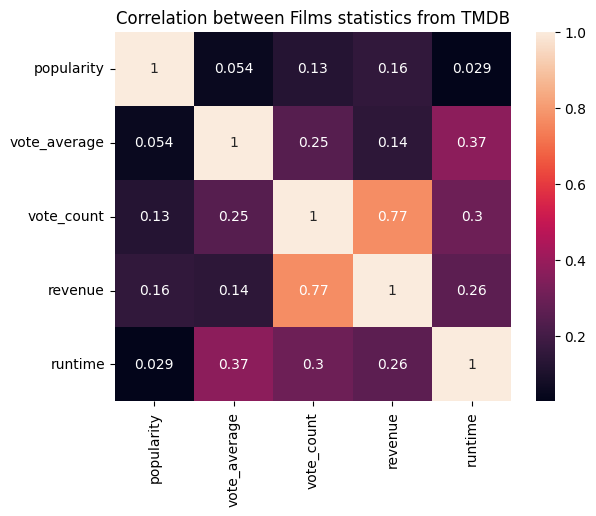

In [22]:
sn.heatmap(dfcorr, annot = True).set(title = 'Correlation between Films statistics from TMDB')
plt.show()

It looks as if  the only pair of data that has a notable correlation between them is vote_count and revenue.

Let's try to graph a heatmap but with df1 now (no missing vote_counts).

In [23]:
df1.drop(['id', 'original_language', 'original_title', 'genre', 'overview', 'tagline', 'release_date'], axis=1).corr()


,popularity,vote_average,vote_count,revenue,runtime
popularity,1.000000,0.064062,0.126602,0.155742,0.028146
vote_average,0.064062,1.000000,0.270421,0.143893,0.245602
vote_count,0.126602,0.270421,1.000000,0.770540,0.301669
revenue,0.155742,0.143893,0.770540,1.000000,0.265652
runtime,0.028146,0.245602,0.301669,0.265652,1.000000


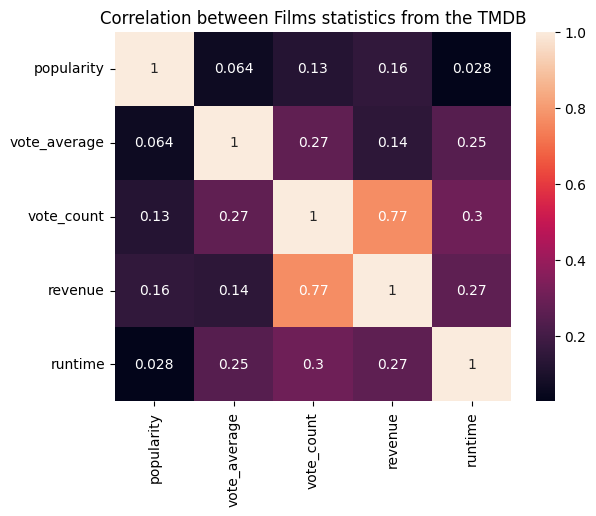

In [24]:
# Exclude non-numeric columns from the DataFrame before calculating the correlation matrix
corr_matrix = df1.drop(['id', 'original_language', 'original_title', 'genre', 'overview', 'tagline', 'release_date'], axis=1).corr()

# Plot the heatmap using seaborn
sn.heatmap(corr_matrix, annot=True).set(title='Correlation between Films statistics from the TMDB')

# Display the plot
plt.show()


It's interesting to see how every number but the correlation between runtime and vote_count has lowered significantly


Popularity vs Vote Count and Revenue

We should look at this because Popularity is an important factor in movie productuion

It will make sense that revenue and vote_count depended on the popularity.

Let's take a look 

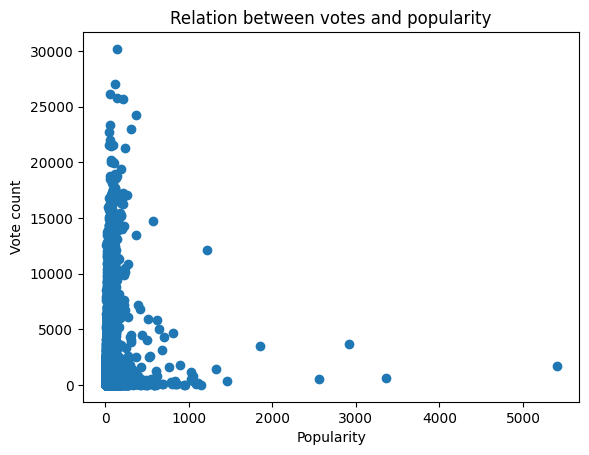

In [25]:
# Extract 'popularity' and 'vote_count' columns as x and y axes
x_axis = df['popularity']
y_axis = df['vote_count']

# Create a scatter plot to visualize the relationship between 'popularity' and 'vote_count'
fig, ax = plt.subplots()
ax.scatter(x_axis, y_axis)

# Set title and labels for better clarity
ax.set_title('Relation between votes and popularity')
ax.set_xlabel('Popularity')
ax.set_ylabel('Vote count')

# Display the plot
plt.show()


This graph does not give us a detailed visualisation on what popularity and vote count

We will attempt this again

The arithmetic mean from 'popularity' will be used as a tool to keep an eye on the values below it.

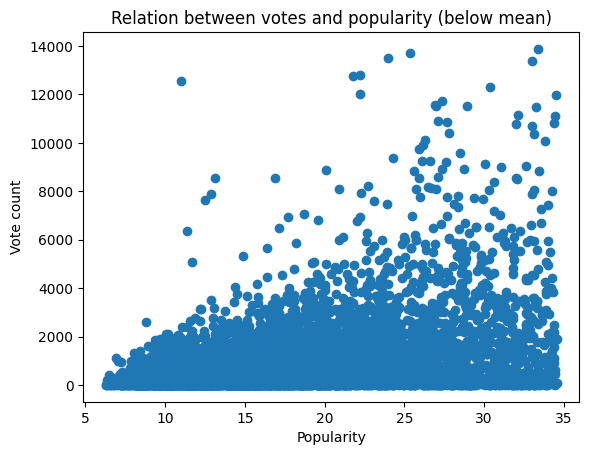

In [26]:
# Calculate the mean of the 'popularity' column
mean_popularity = df['popularity'].mean()

# Filter data points where 'popularity' is below the mean
x_axis = df['popularity'].loc[df['popularity'] < mean_popularity]
y_axis = df['vote_count'].loc[df['popularity'] < mean_popularity]

# Create a scatter plot for data points below the mean popularity
fig, ax = plt.subplots()
ax.scatter(x_axis, y_axis)

# Set title and labels for better clarity
ax.set_title('Relation between votes and popularity (below mean)')
ax.set_xlabel('Popularity')
ax.set_ylabel('Vote count')

# Display the plot
plt.show()

Working with df1's data does not change that much either. 
Using a seaborn histogram shows how films with popularity oscilating between 5 and 15 (very low) tend to have 0 to 2000 vote counts.

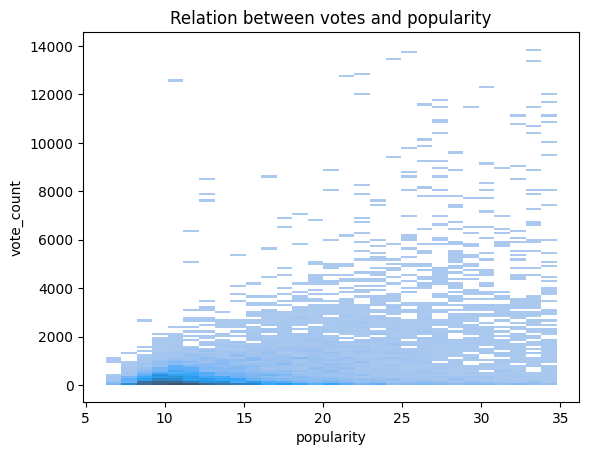

In [27]:
# Calculate the mean of the 'popularity' column in df1
mean_popularity = df1['popularity'].mean()

# Filter data points where 'popularity' is below the mean in df1
x_axis = df1['popularity'].loc[df1['popularity'] < mean_popularity]
y_axis = df1['vote_count'].loc[df1['popularity'] < mean_popularity]

# Create a histogram plot for data points below the mean popularity using seaborn
sn.histplot(x=x_axis, y=y_axis).set(title='Relation between votes and popularity')

# Display the plot
plt.show()


Let's verify by using 'revenue' instead of 'vote_count'!



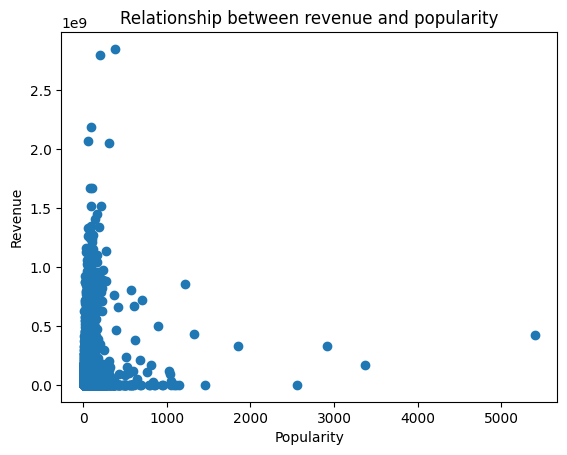

In [28]:
# Extract 'popularity' and 'revenue' columns as x and y axes
x_axis = df['popularity']
y_axis = df['revenue']

# Create a scatter plot to visualize the relationship between 'popularity' and 'revenue'
fig, ax = plt.subplots()
ax.scatter(x_axis, y_axis)

# Set title and labels for better clarity
ax.set_title('Relationship between revenue and popularity')
ax.set_xlabel('Popularity')
ax.set_ylabel('Revenue')

# Display the plot
plt.show()


Similar tendency on a surface levels.

Let's now graph revenue vs vote count. A very disperse but growing tendency is shown on the plot.

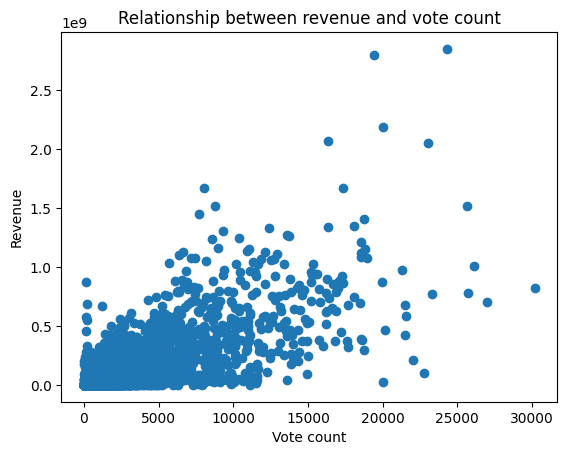

In [29]:
# Extract 'vote_count' and 'revenue' columns as x and y axes
x_axis = df['vote_count']
y_axis = df['revenue']

# Create a scatter plot to visualize the relationship between 'vote_count' and 'revenue'
fig, ax = plt.subplots()
ax.scatter(x_axis, y_axis)

# Set title and labels for better clarity
ax.set_title('Relationship between revenue and vote count')
ax.set_xlabel('Vote count')
ax.set_ylabel('Revenue')

# Display the plot
plt.show()
